In [78]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import random

In [79]:
from igraph import Graph, Layout
import igraph as ig
karate = Graph.Famous("Zachary")
layout = karate.layout_kamada_kawai()
visual_style={"bbox": (300, 300), "margin": 15, "layout": layout}

cl = karate.community_fastgreedy()
membership = cl.as_clustering().membership
pal = ig.drawing.colors.ClusterColoringPalette(len(membership))
karate.vs["color"] = pal.get_many(cl.as_clustering().membership)
karate.vs["size"] = 15

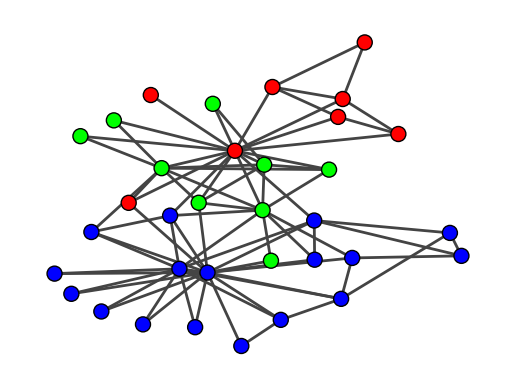

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ig.plot(karate, target=ax)

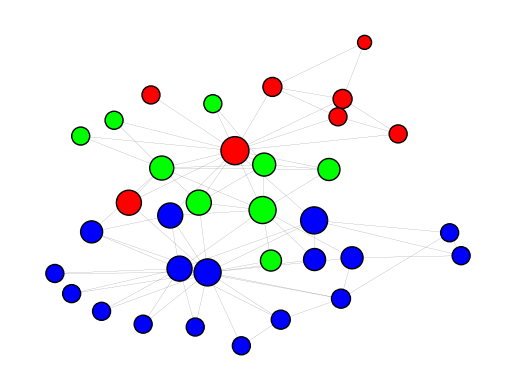

In [81]:
centralities = karate.closeness()
karate.vs['size'] = [c * 50 for c in centralities]

fig, ax = plt.subplots()
ig.plot(
    karate, 
    target=ax,
    edge_width=0.1
)

In [82]:
karate.betweenness()

[231.0714285714286,
 28.478571428571424,
 75.85079365079366,
 6.288095238095237,
 0.3333333333333333,
 15.833333333333334,
 15.833333333333332,
 0.0,
 29.529365079365082,
 0.44761904761904764,
 0.3333333333333333,
 0.0,
 0.0,
 24.215873015873015,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.1468253968254,
 0.0,
 0.0,
 0.0,
 9.299999999999999,
 1.1666666666666665,
 2.0277777777777777,
 0.0,
 11.79206349206349,
 0.9476190476190476,
 1.5428571428571427,
 7.609523809523807,
 73.00952380952378,
 76.69047619047619,
 160.5515873015873]

In [83]:
karate.degree()

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

In [84]:
karate.closeness()

[0.5689655172413793,
 0.4852941176470588,
 0.559322033898305,
 0.4647887323943662,
 0.3793103448275862,
 0.38372093023255816,
 0.38372093023255816,
 0.44,
 0.515625,
 0.4342105263157895,
 0.3793103448275862,
 0.36666666666666664,
 0.3707865168539326,
 0.515625,
 0.3707865168539326,
 0.3707865168539326,
 0.28448275862068967,
 0.375,
 0.3707865168539326,
 0.5,
 0.3707865168539326,
 0.375,
 0.3707865168539326,
 0.39285714285714285,
 0.375,
 0.375,
 0.3626373626373626,
 0.4583333333333333,
 0.4520547945205479,
 0.38372093023255816,
 0.4583333333333333,
 0.5409836065573771,
 0.515625,
 0.55]

In [88]:
def approximated_mean_shortest_path_igraph(graph, sample_size=10):
    mean_shortest_paths = {}

    # Total number of nodes in the graph
    nodes = list(range(graph.vcount()))

    for node in nodes:
        # Sample a subset of nodes to approximate the mean
        sampled_nodes = nodes if len(nodes) <= sample_size else random.sample(nodes, sample_size)

        # Calculate shortest paths from the current node to sampled nodes
        distances = graph.shortest_paths(source=node, target=sampled_nodes)[0]

        # Exclude unreachable nodes (distance == infinity)
        reachable_distances = [d for d in distances if d != float('inf')]

        # Compute mean shortest path for the node
        if reachable_distances:
            mean_shortest_paths[node] = sum(reachable_distances) / len(reachable_distances)
        else:
            mean_shortest_paths[node] = float('inf')  # No reachable nodes

    return mean_shortest_paths

results = approximated_mean_shortest_path_igraph(karate, sample_size=7)

# Print the results
for node, mean_distance in results.items():
    print(f"Node {node}: Approximated Mean Shortest Path = {mean_distance:.2f}")


Node 0: Approximated Mean Shortest Path = 1.57
Node 1: Approximated Mean Shortest Path = 1.57
Node 2: Approximated Mean Shortest Path = 1.71
Node 3: Approximated Mean Shortest Path = 2.57
Node 4: Approximated Mean Shortest Path = 2.29
Node 5: Approximated Mean Shortest Path = 2.71
Node 6: Approximated Mean Shortest Path = 3.71
Node 7: Approximated Mean Shortest Path = 2.00
Node 8: Approximated Mean Shortest Path = 1.86
Node 9: Approximated Mean Shortest Path = 2.14
Node 10: Approximated Mean Shortest Path = 2.57
Node 11: Approximated Mean Shortest Path = 2.71
Node 12: Approximated Mean Shortest Path = 2.29
Node 13: Approximated Mean Shortest Path = 2.14
Node 14: Approximated Mean Shortest Path = 2.57
Node 15: Approximated Mean Shortest Path = 2.57
Node 16: Approximated Mean Shortest Path = 3.29
Node 17: Approximated Mean Shortest Path = 2.57
Node 18: Approximated Mean Shortest Path = 2.43
Node 19: Approximated Mean Shortest Path = 2.00
Node 20: Approximated Mean Shortest Path = 2.57
No

C:\Users\giuli\AppData\Local\Temp\ipykernel_11548\2428717484.py:12: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  distances = graph.shortest_paths(source=node, target=sampled_nodes)[0]


In [86]:
karate.closeness()

[0.5689655172413793,
 0.4852941176470588,
 0.559322033898305,
 0.4647887323943662,
 0.3793103448275862,
 0.38372093023255816,
 0.38372093023255816,
 0.44,
 0.515625,
 0.4342105263157895,
 0.3793103448275862,
 0.36666666666666664,
 0.3707865168539326,
 0.515625,
 0.3707865168539326,
 0.3707865168539326,
 0.28448275862068967,
 0.375,
 0.3707865168539326,
 0.5,
 0.3707865168539326,
 0.375,
 0.3707865168539326,
 0.39285714285714285,
 0.375,
 0.375,
 0.3626373626373626,
 0.4583333333333333,
 0.4520547945205479,
 0.38372093023255816,
 0.4583333333333333,
 0.5409836065573771,
 0.515625,
 0.55]